## Library & Setting

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import missingno as msno
from tqdm import tqdm_notebook as tq
pd.set_option('display.max_row',300)
%matplotlib inline
warnings.filterwarnings(action='ignore')

In [2]:
path=os.getenv("HOME") + ('/repo/Lpoint-Hackathon/data/')
filename = ["01.Online.csv",  "02.Transaction.csv","04.demographic.csv", "03.Product classification.csv"]

## Data Loading

### 온라인 행동 정보(online)

In [3]:
online_dtype = {'clnt_id':'int64', 
                'sess_id':'int64',
                'hit_seq':'int64',
                'action_type':'int64',
                'biz_unit':'category', # 카테고리 형태
                'sess_dt':'object', # 분석할 때 날짜 형태로 변경
                'hit_tm':'object', # 분석할 때 시간 형태로 변경
                'hit_pss_tm':'int64',
                'trans_id':'float64', # NaN을 지원하는 float64로 설정
                'sech_kwd':'object',
                'tot_pag_view_ct':'float64', # NaN을 지원하는 float64로 설정
                'tot_sess_hr_v':'float64', # NaN을 지원하는 float64로 설정
                'trfc_src':'category', # 카테고리 형태
                'dvc_ctg_nm':'object' # 추후에 카테고리로 변경
               }

online = pd.read_csv(path + filename[0], dtype=online_dtype)
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196362 entries, 0 to 3196361
Data columns (total 14 columns):
 #   Column           Dtype   
---  ------           -----   
 0   clnt_id          int64   
 1   sess_id          int64   
 2   hit_seq          int64   
 3   action_type      int64   
 4   biz_unit         category
 5   sess_dt          object  
 6   hit_tm           object  
 7   hit_pss_tm       int64   
 8   trans_id         float64 
 9   sech_kwd         object  
 10  tot_pag_view_ct  float64 
 11  tot_sess_hr_v    float64 
 12  trfc_src         category
 13  dvc_ctg_nm       object  
dtypes: category(2), float64(3), int64(5), object(4)
memory usage: 298.7+ MB


In [45]:
a02 = online[online['biz_unit']=='A02']

In [46]:
a02_key = a02['sech_kwd'].dropna().unique()

In [47]:
new_a02_kwd=pd.DataFrame(a02_key)

In [48]:
new_a02_kwd.to_csv('./new_a02_kwd.csv')

In [61]:
new_a02_kwd[new_a02_kwd[0] == '쉐프윈'].index

Int64Index([335], dtype='int64')

In [49]:
len(new_a02_kwd)

19562

In [60]:
key = online['애플트'].dropna()

KeyError: '애플트리'

In [20]:
test = key.value()

In [22]:
len(test)

101952

In [25]:
test1 = test.tolist()

In [26]:
test1

['버터',
 '카누',
 '비비고만두',
 '어묵',
 '고메핫도그',
 '핫도그',
 'cj',
 '탄산',
 '곤드레나물밥',
 '고추가루',
 '카프리썬',
 '콩나물',
 '레쓰비',
 '계란15',
 '매일우유',
 '우동',
 '소면',
 '밀떡',
 '동원 요거트',
 '비빔밥',
 '대패삼겹살',
 '매운짜장',
 '오이',
 '대파',
 '진라면',
 '미니꿀호떡',
 '생크림요거트',
 '우유',
 '떡국떡',
 '탄산음료',
 '비빔면',
 '짬뽕',
 '계란후라이',
 '요플레',
 '라이트누들',
 '리그난 참기름',
 '양파',
 '닭볶음탕',
 '피클',
 '미미네떡볶이',
 '죠리퐁',
 '초코하임',
 '맛짬뽕',
 '쌈채소',
 '오이피클',
 '두부',
 '컵누들',
 '계란',
 '짜장',
 '하이면',
 '너프알파파이어',
 '방울토마토',
 '감자칩',
 '가스렌지',
 '락스',
 '김',
 '식빵',
 '소불고기',
 '과자',
 '카누라떼',
 '카레',
 '만두',
 '너겟',
 '수염차',
 '쿠크다스',
 '미니돈까스',
 '보리차',
 '핫식스',
 '스파게티',
 '박카스',
 '사골',
 '헛개차',
 '옥수수차',
 '유부초밥',
 '결명자차',
 '국산 두부',
 '부대찌개',
 '차돌박이',
 '양퍼',
 '돼지 불고기',
 '생수',
 '옥수수수염차',
 '고무장갑',
 '메추리알',
 '주방휴지',
 '생수 2',
 '국산두부',
 '오다리',
 '스팸',
 '당근',
 '꾸이꾸이',
 '국거리',
 '하이라이스',
 '하늘보리',
 '옥수수 수염차',
 '이면수',
 '서울우유',
 '초코우유',
 '유료회원',
 '계란말이',
 '토마토',
 '알로에쥬스',
 '프로바이오틱',
 '볶음밥',
 '미역국',
 '돼지갈비찜',
 '버섯된장찌게',
 '오뎅탕',
 '돼지갈비',
 '감자',
 '빙그레우유',
 '비비고 새우볶음밥',
 '감귤쥬스',
 '패음료',
 '푸르밀',
 '갈비탕',
 '비

### 거래 정보(trade)

In [28]:
trade_dtype = {'clnt_id':'int64',
               'trans_id':'float64',
               'biz_unit':'category',
               'pd_c':'object', # 'unknown' 이라는 형태 존재
               'de_dt':'object',
               'de_tm':'object',
               'buy_am':'int64',
               'buy_ct':'int64'}

trade = pd.read_csv(path + filename[1], dtype=trade_dtype)
trade.info()

### 고객 정보(customer)

In [31]:
customer_dtype = {'clnt_id':'int64',
                  'clnt_gender':'object',
                  'clnt_age':'object'}
customer = pd.read_csv(path + filename[2], dtype=customer_dtype)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72399 entries, 0 to 72398
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clnt_id      72399 non-null  int64 
 1   clnt_gender  72399 non-null  object
 2   clnt_age     72399 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### 상품분류 정보(item)

In [32]:
item_dtype = {'pd_c':'float64', # 거래 정보 데이터와 일치하도록 설정
              'clac_nm1':'category',
              'clac_nm2':'category',
              'clac_nm3':'category'}
item = pd.read_csv(path + filename[3], dtype=item_dtype)
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pd_c      1667 non-null   float64 
 1   clac_nm1  1667 non-null   category
 2   clac_nm2  1667 non-null   category
 3   clac_nm3  1665 non-null   category
dtypes: category(3), float64(1)
memory usage: 127.3 KB


## Data Cleansing

### 온라인 행동 정보(online)

#### 결측치 처리

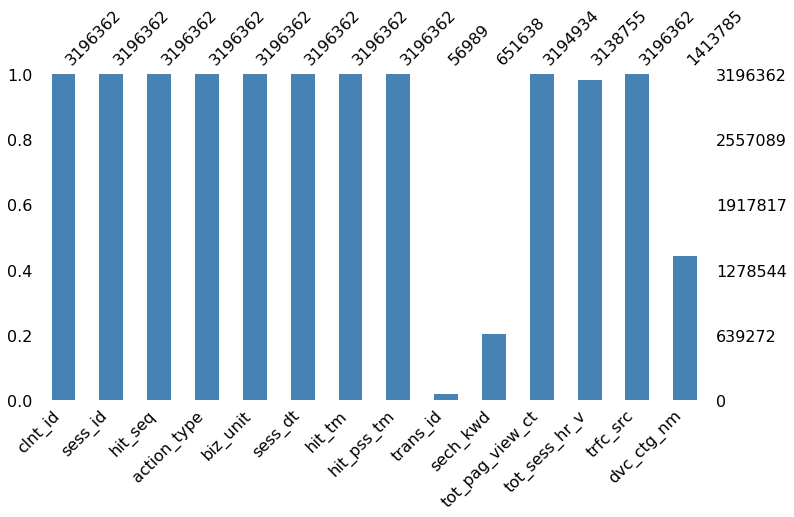

In [33]:
msno.bar(online, figsize=(12,6), color='steelblue')

- trans_id: trains_id에 aN이 가장 많습니다. 하지만 고유의 거래 아이디이기 때문에 섣불리 바꿀수 없습니다.
- sech_kwd: 
- tot_pag_view_ct: 총페이지조회건수가 NaN이라면 0이 맞을까?? 
- tot_sess_hr_v: 총세션시간값이 NaN이라면 0이 맞을까??
- dvc_ctg_nm: NaN은 활동이 없는 기기 유형이지만, 기록이 되어야 하므로 trfc_src의 unknown으로 대체합니다.

In [37]:
online[online['tot_pag_view_ct'].isnull()]

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
2192,39575,1,1,2,A03,20190704,08:14,0,NaN,NaN,NaN,NaN,WEBSITE,mobile_web
11752,47755,20,1,3,A03,20190818,01:27,2837,NaN,NaN,NaN,4.0,DIRECT,NaN
31524,11605,24,1,3,A03,20190811,19:58,207,NaN,NaN,NaN,NaN,DIRECT,NaN
36122,50615,75,1,3,A03,20190921,14:25,30210,NaN,NaN,NaN,30.0,DIRECT,NaN
40438,43730,11,3,3,A03,20190923,13:21,93862,NaN,NaN,NaN,543.0,DIRECT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530653,33049,13,1,2,A02,20190710,18:41,0,NaN,NaN,NaN,NaN,unknown,mobile_web
2533028,62079,3,1,2,A02,20190702,18:21,0,NaN,NaN,NaN,NaN,unknown,mobile_web
2539441,48357,1,1,6,A01,20190723,00:00,0,57474.0,NaN,NaN,NaN,unknown,mobile_app
2541727,63462,2,1,6,A01,20190709,13:51,0,44543.0,NaN,NaN,NaN,unknown,mobile_web


## 중복값 처리


### 거래 정보(trade)

In [38]:
trade['pd_c'].unique()

array(['unknown', '0565', '0572', ..., '0689', '1078', '0305'],
      dtype=object)

pd_c의 unknown은 종류를 알지 못하는 것으로 NaN으로 대체합니다. 

### 고객 정보(customer)

In [39]:
print(customer['clnt_gender'].unique())
print(customer['clnt_age'].unique())

['unknown' 'F' 'M']
['unknown' '30' '40' '20' '50' '60' '10']


unknown'은 비식별 인원을 의미하는데, 추후 편리함을 위해 np.NaN으로 변경합니다. 

### Data Saving

각 key 값의 순서별로 순서를 매겨 저장합니다